In [1]:
#importing of necessary libraries
import pandas as pd  
import numpy as np  
import seaborn as sns 
import matplotlib.pyplot as plt
import talib
import pynance as pn

In [2]:
# Path of csv files

df1 = pd.read_csv("C:\\Users\\1221\\Desktop\\KIFYA SCHOLASHIP\\WEEK 1\\yfinance_data\\AAPL_historical_data.csv")
df2 = pd.read_csv("C:\\Users\\1221\\Desktop\\KIFYA SCHOLASHIP\\WEEK 1\\yfinance_data\\AMZN_historical_data.csv")
df3 = pd.read_csv("C:\\Users\\1221\\Desktop\\KIFYA SCHOLASHIP\\WEEK 1\\yfinance_data\\GOOG_historical_data.csv")
df4 = pd.read_csv("C:\\Users\\1221\\Desktop\\KIFYA SCHOLASHIP\\WEEK 1\\yfinance_data\\META_historical_data.csv")
df5 = pd.read_csv("C:\\Users\\1221\\Desktop\\KIFYA SCHOLASHIP\\WEEK 1\\yfinance_data\\MSFT_historical_data.csv")
df6 = pd.read_csv("C:\\Users\\1221\\Desktop\\KIFYA SCHOLASHIP\\WEEK 1\\yfinance_data\\NVDA_historical_data.csv")
df7 = pd.read_csv("C:\\Users\\1221\\Desktop\\KIFYA SCHOLASHIP\\WEEK 1\\yfinance_data\\TSLA_historical_data.csv")

In [3]:
df1['Company'] = "APPLE"
df2['Company'] = "Amazon"
df3['Company'] = "Google"
df4['Company'] = "Meta"
df5['Company'] = "Microsoft"
df6['Company'] = "Nivida"
df7['Company'] = "Tesla"

In [4]:
# Concatenating the DataFrames
df = pd.concat([df1, df2, df3, df4, df5, df6, df7], ignore_index=True)

# Display the merged DataFrame
df

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Company
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,APPLE
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,APPLE
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,APPLE
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,APPLE
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,APPLE
...,...,...,...,...,...,...,...,...,...,...
45423,2024-07-24,225.419998,225.990005,214.710007,215.990005,215.990005,167942900,0.0,0.0,Tesla
45424,2024-07-25,216.800003,226.000000,216.229996,220.250000,220.250000,100636500,0.0,0.0,Tesla
45425,2024-07-26,221.190002,222.279999,215.330002,219.800003,219.800003,94604100,0.0,0.0,Tesla
45426,2024-07-29,224.899994,234.270004,224.699997,232.100006,232.100006,129201800,0.0,0.0,Tesla


In [5]:
df.shape

(45428, 10)

In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,45428.000000,45428.000000,45428.000000,45428.000000,45428.000000,4.542800e+04,45428.000000,45428.000000
mean,46.798370,47.397792,46.190101,46.810590,45.367891,2.177785e+08,0.000847,0.002499
std,78.259474,79.277620,77.218532,78.274673,78.049554,3.076645e+08,0.022527,0.155291
min,0.034896,0.035547,0.033333,0.034115,0.031291,0.000000e+00,0.000000,0.000000
25%,0.690500,0.708000,0.673541,0.693604,0.585204,4.746455e+07,0.000000,0.000000
50%,13.646101,13.827710,13.463250,13.644750,13.076301,9.921200e+07,0.000000,0.000000
75%,47.242501,47.720626,46.628125,47.193626,44.768961,2.610595e+08,0.000000,0.000000
max,542.349976,542.809998,528.359985,539.909973,539.909973,9.230856e+09,3.080000,20.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45428 entries, 0 to 45427
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          45428 non-null  object 
 1   Open          45428 non-null  float64
 2   High          45428 non-null  float64
 3   Low           45428 non-null  float64
 4   Close         45428 non-null  float64
 5   Adj Close     45428 non-null  float64
 6   Volume        45428 non-null  int64  
 7   Dividends     45428 non-null  float64
 8   Stock Splits  45428 non-null  float64
 9   Company       45428 non-null  object 
dtypes: float64(7), int64(1), object(2)
memory usage: 3.5+ MB


In [8]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits', 'Company'],
      dtype='object')

In [11]:
# Calculate a 20-period Simple Moving Average (SMA)
df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)

# Calculate the RSI (Relative Strength Index)
df['RSI'] = talib.RSI(df['Close'], timeperiod=14)

# Calculate MACD (Moving Average Convergence Divergence)
df['MACD'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(df['Close'])

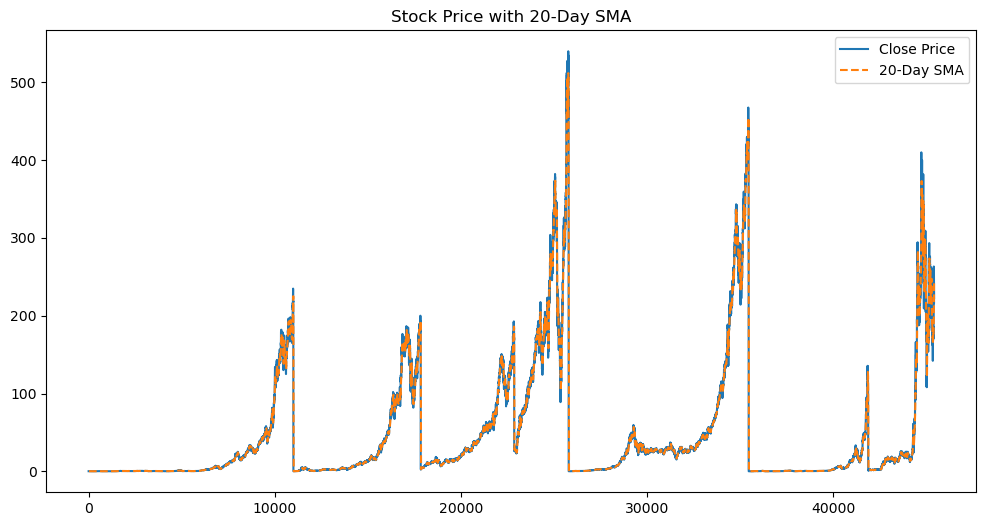

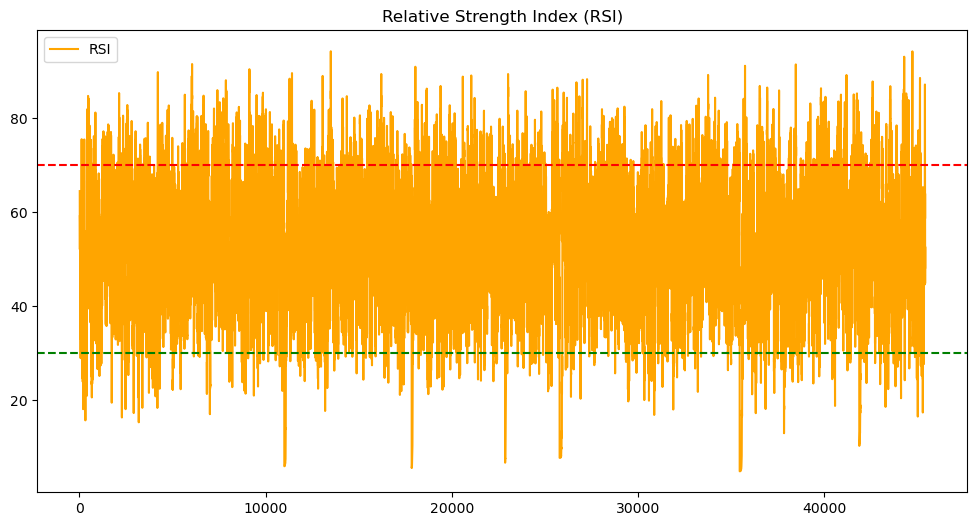

In [13]:
# Plot the Closing price along with the 20-period SMA
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['SMA_20'], label='20-Day SMA', linestyle='--')
plt.title('Stock Price with 20-Day SMA')
plt.legend()
plt.show()

# Plot RSI
plt.figure(figsize=(12, 6))
plt.plot(df['RSI'], label='RSI', color='orange')
plt.title('Relative Strength Index (RSI)')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.legend()
plt.show()

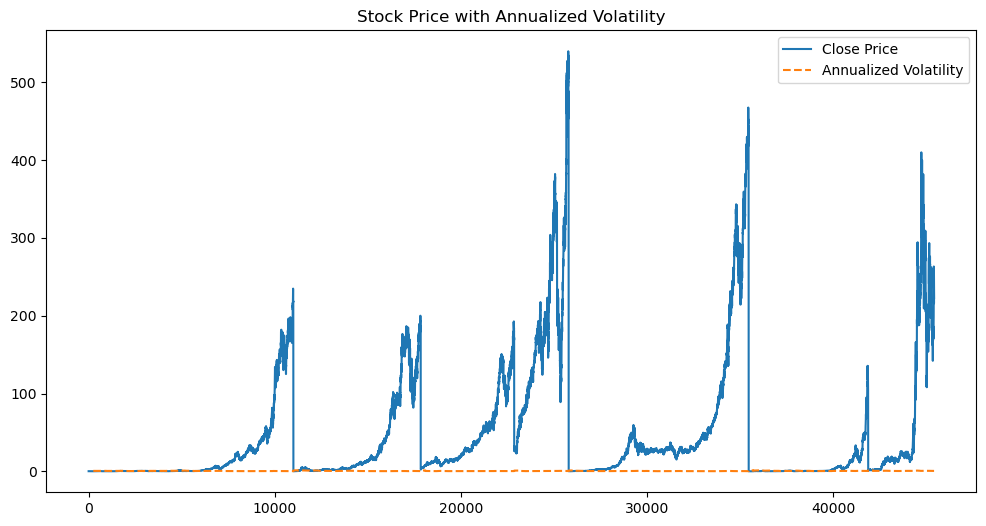

In [14]:
# Calculate Daily Returns
df['daily_returns'] = df['Close'].pct_change()

# Calculate Annualized Volatility
df['volatility'] = df['daily_returns'].rolling(window=252).std() * np.sqrt(252)

# Plot the Closing price and Volatility
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['volatility'], label='Annualized Volatility', linestyle='--')
plt.title('Stock Price with Annualized Volatility')
plt.legend()
plt.show()

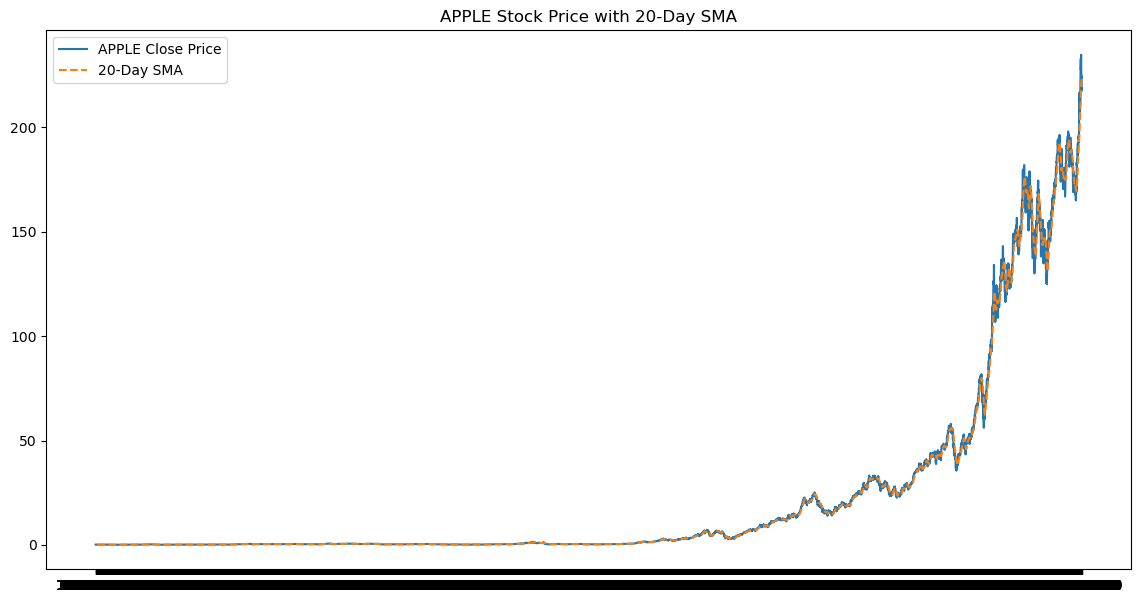

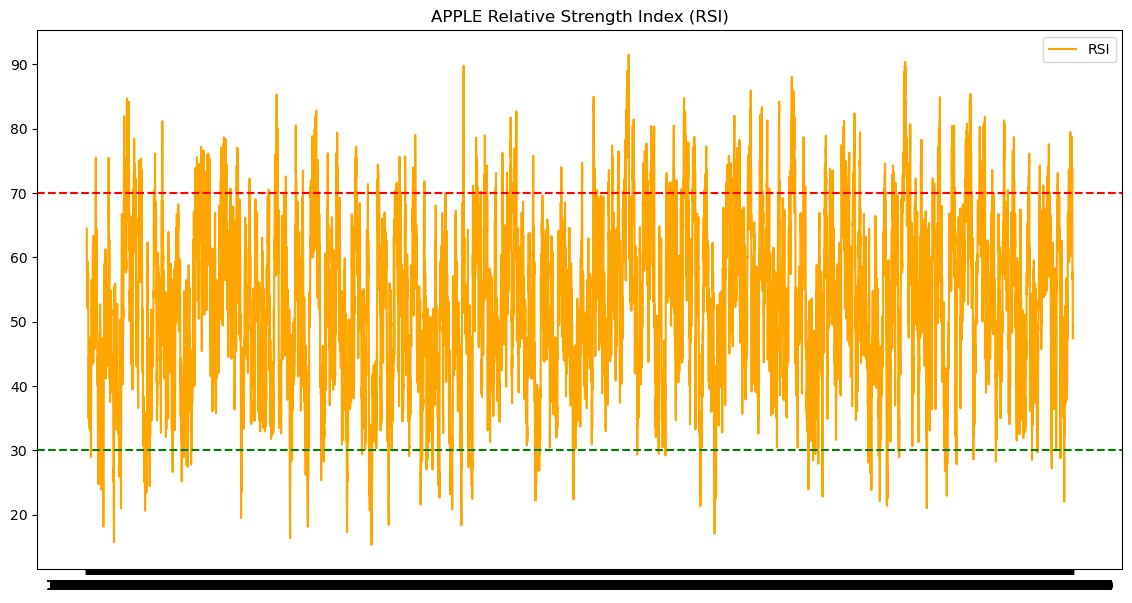

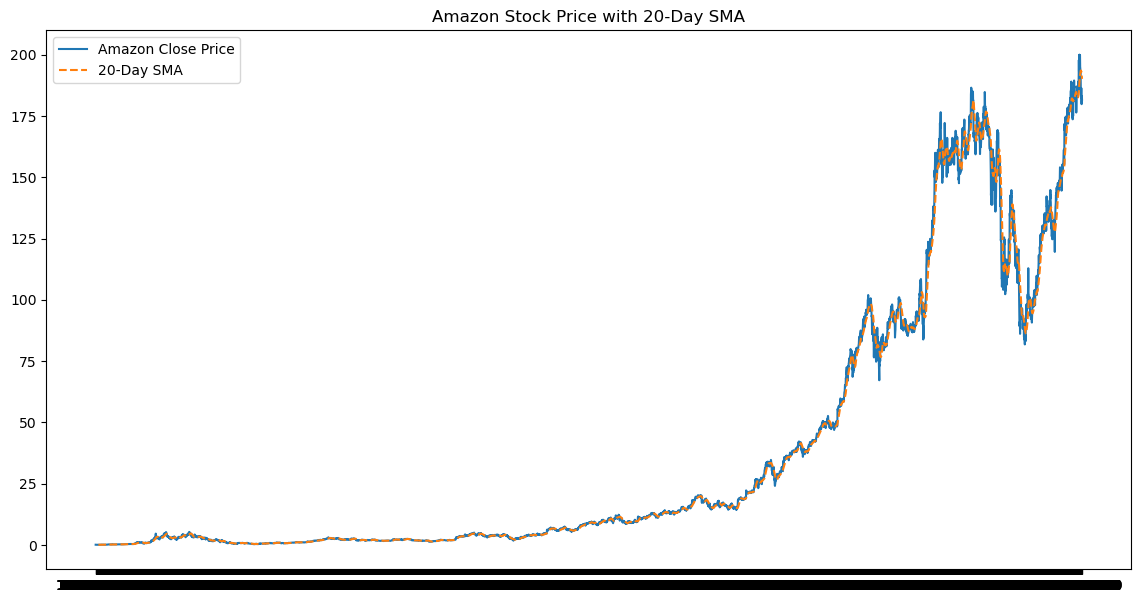

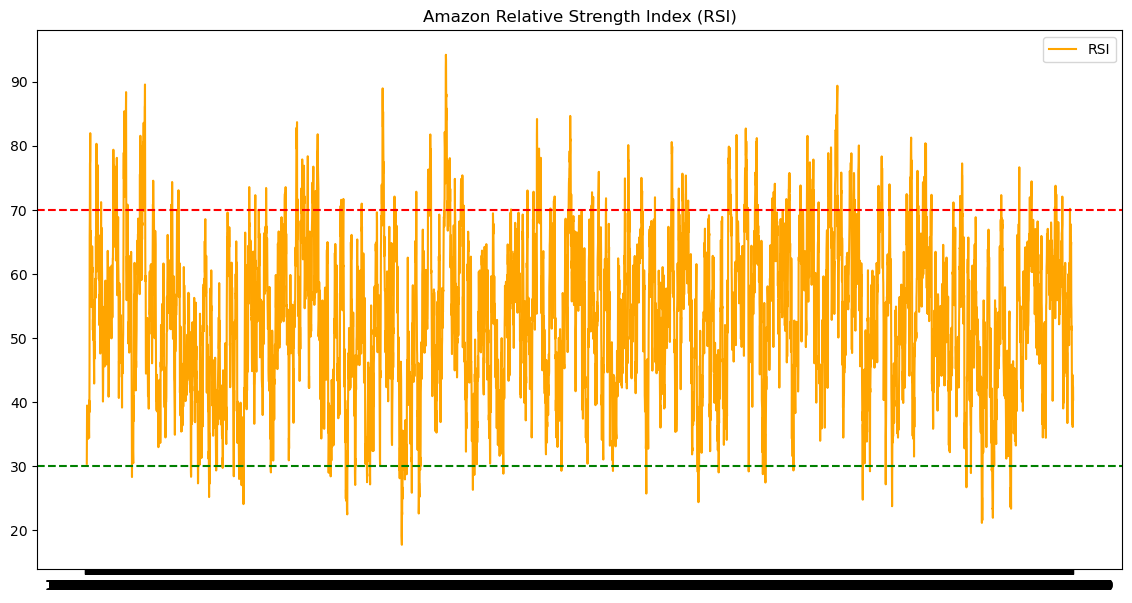

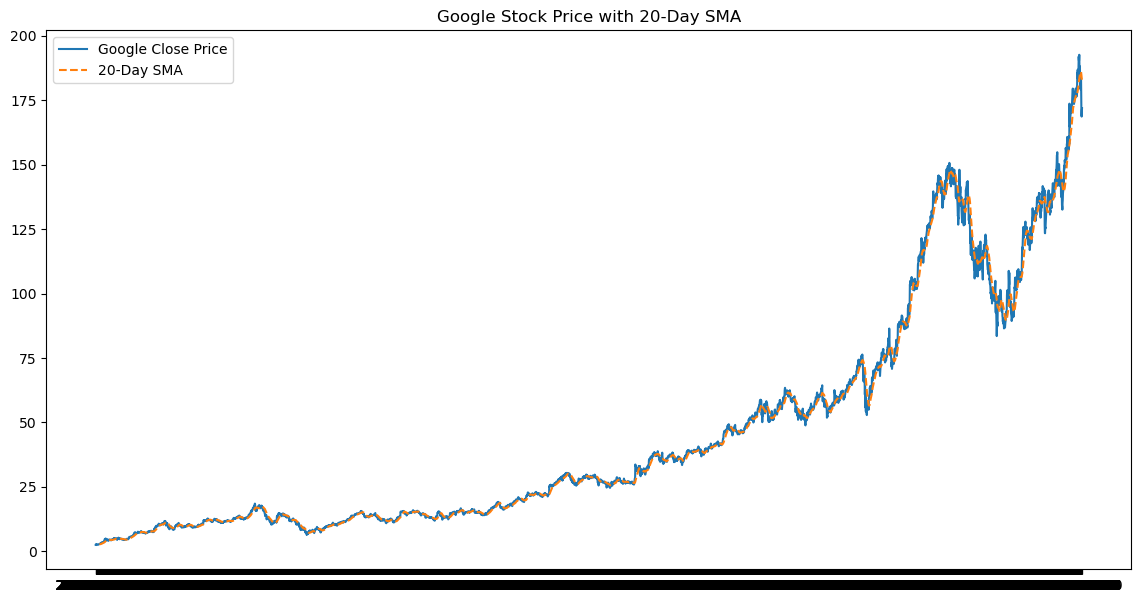

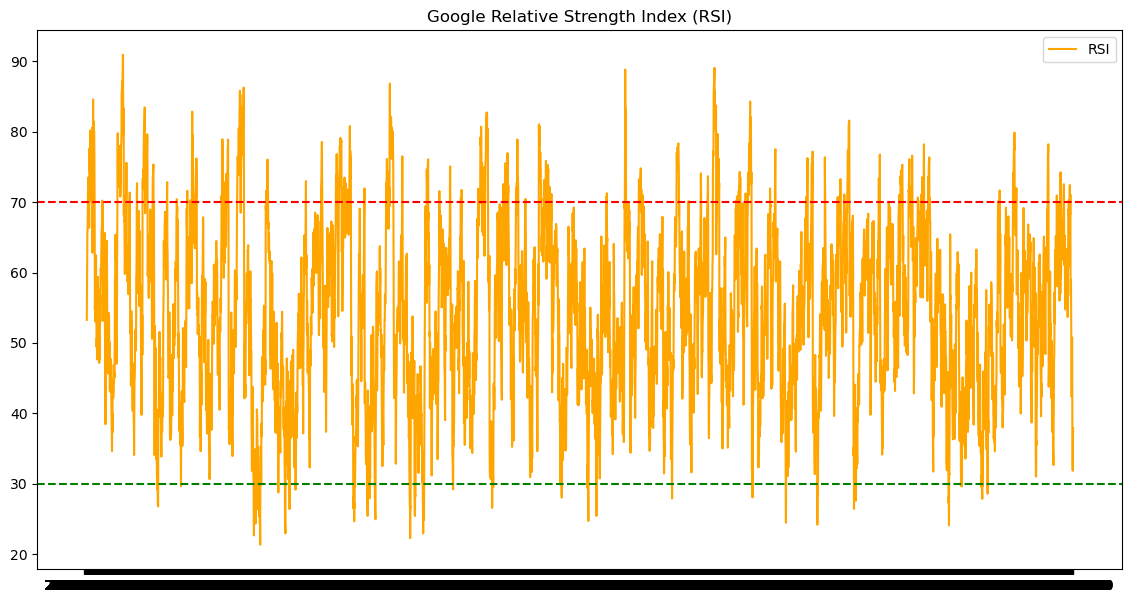

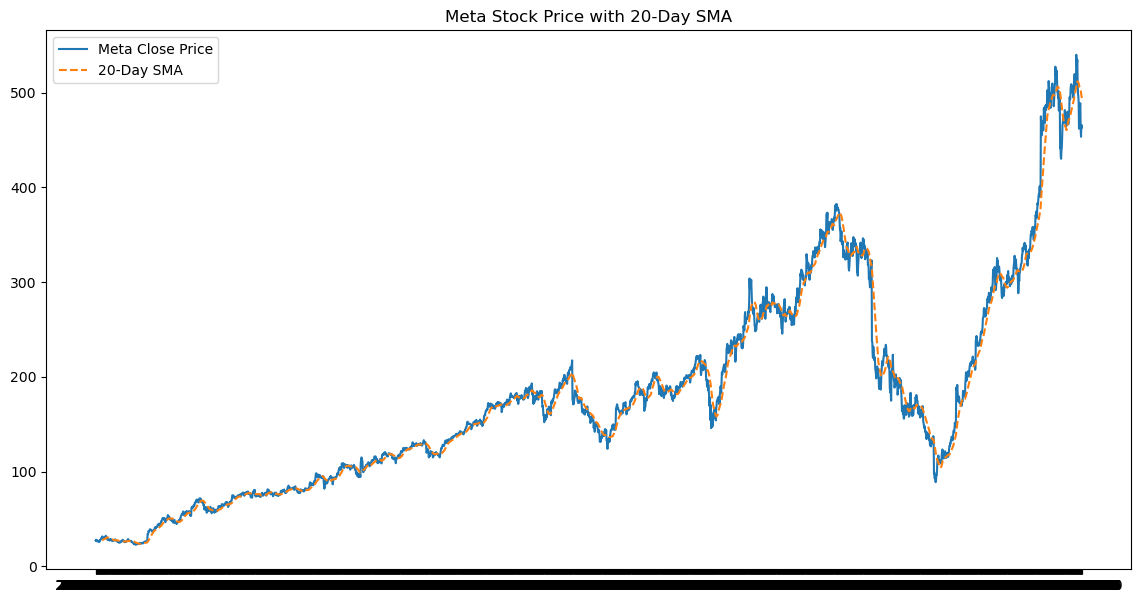

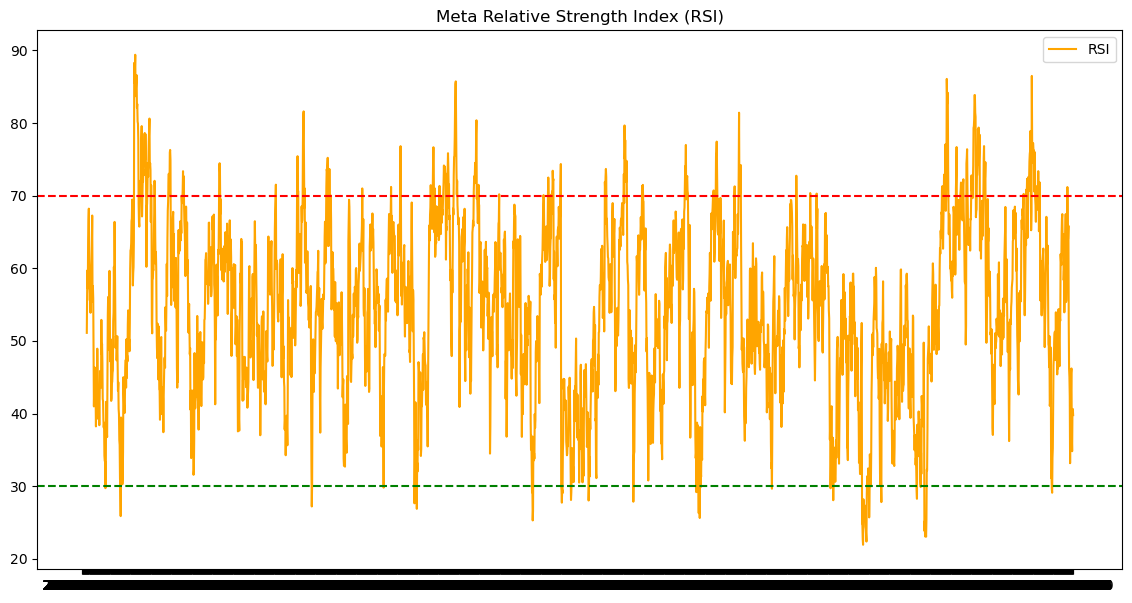

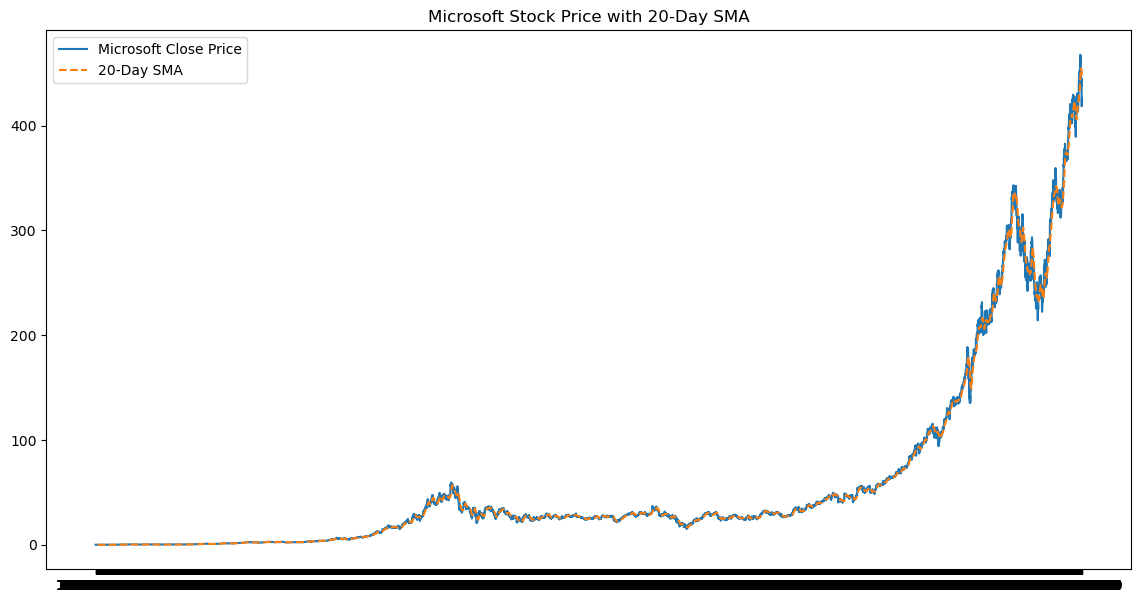

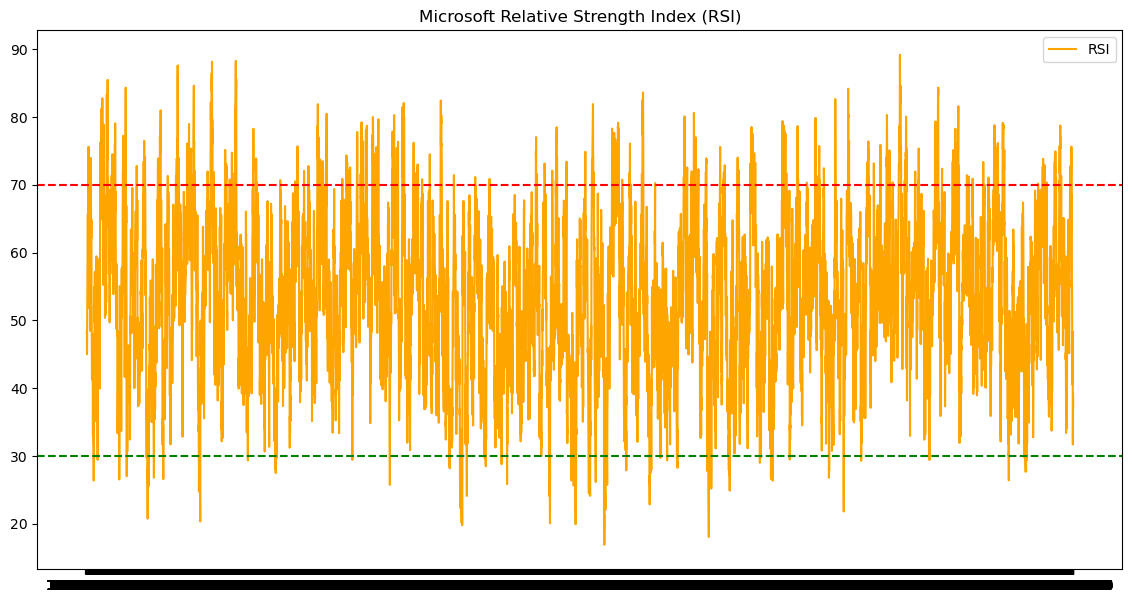

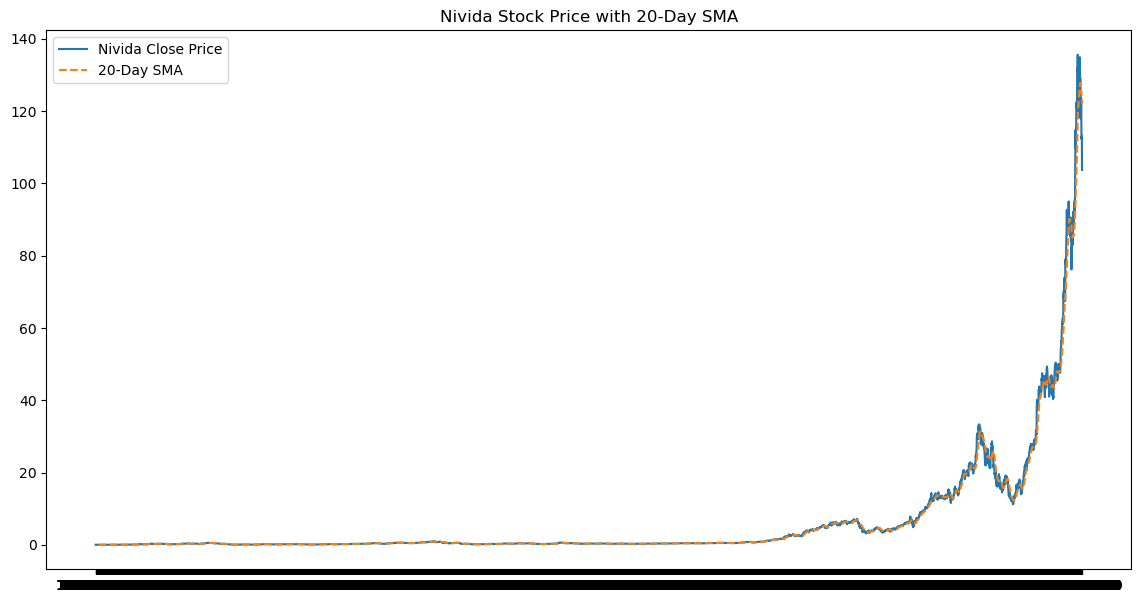

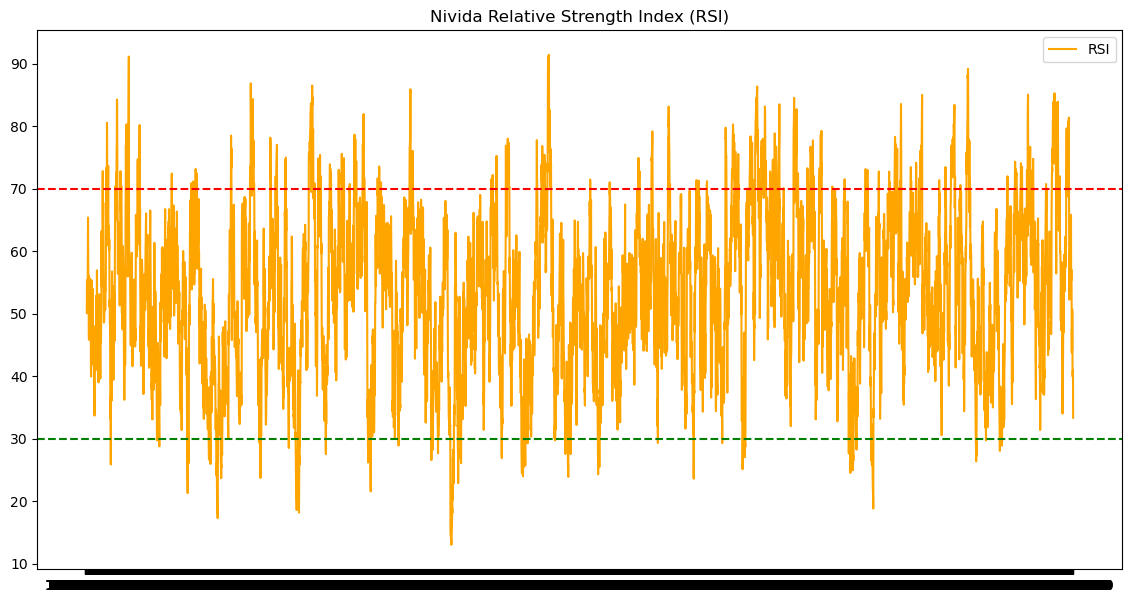

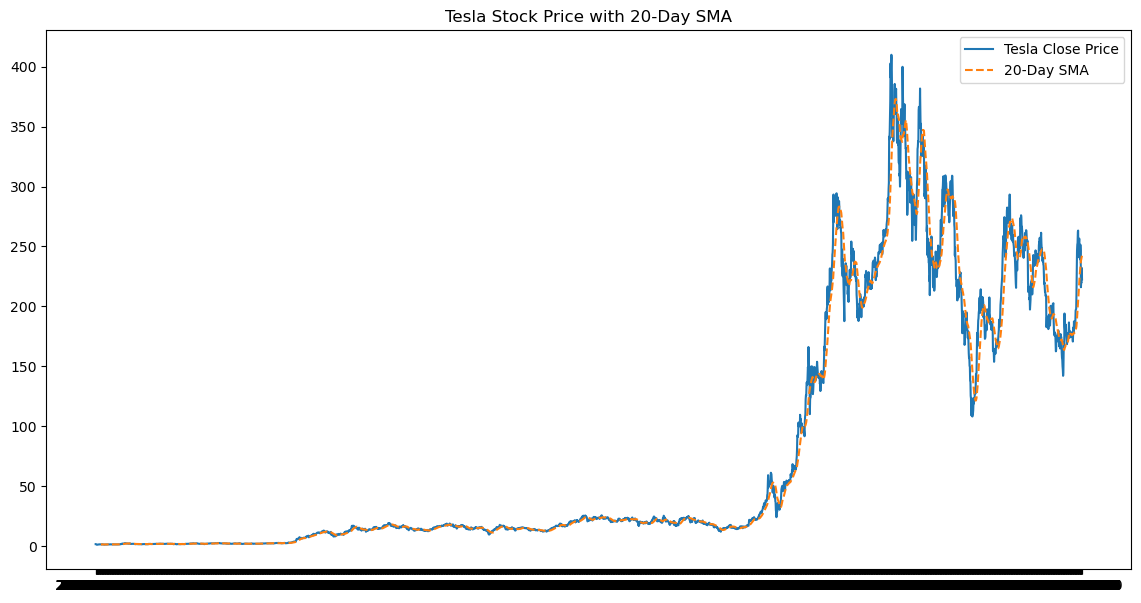

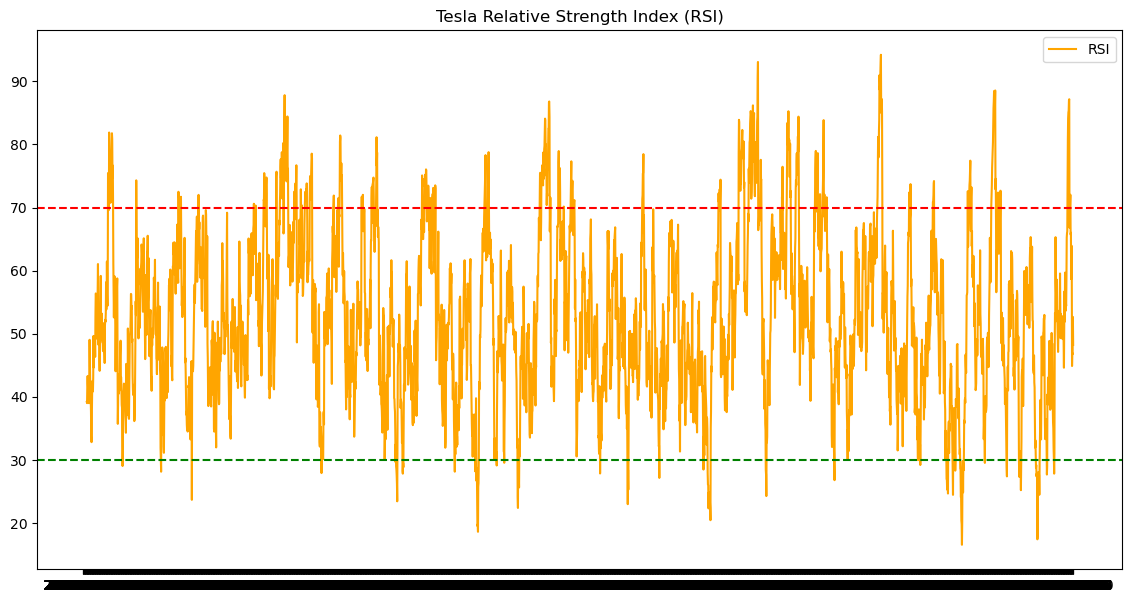

In [15]:
# Group data by the 'Company' column
grouped = df.groupby('Company')

# Create a dictionary to store the results for each company
company_results = {}

# Loop through each group (company)
for company, data in grouped:
    # Ensure the data is sorted by date
    data = data.sort_values(by='Date')
    
    # Calculate technical indicators using TA-Lib
    data['SMA_20'] = talib.SMA(data['Close'], timeperiod=20)
    data['RSI'] = talib.RSI(data['Close'], timeperiod=14)
    data['MACD'], data['MACD_signal'], data['MACD_hist'] = talib.MACD(data['Close'])

    # Calculate Daily Returns
    data['daily_returns'] = data['Close'].pct_change()

    # Calculate Annualized Volatility
    data['volatility'] = data['daily_returns'].rolling(window=252).std() * np.sqrt(252)
    
    # Store the processed data for each company
    company_results[company] = data

    # Example visualization for each company
    plt.figure(figsize=(14, 7))
    plt.plot(data['Date'], data['Close'], label=f'{company} Close Price')
    plt.plot(data['Date'], data['SMA_20'], label='20-Day SMA', linestyle='--')
    plt.title(f'{company} Stock Price with 20-Day SMA')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(14, 7))
    plt.plot(data['Date'], data['RSI'], label='RSI', color='orange')
    plt.axhline(70, color='red', linestyle='--')
    plt.axhline(30, color='green', linestyle='--')
    plt.title(f'{company} Relative Strength Index (RSI)')
    plt.legend()
    plt.show()
